<a href="https://colab.research.google.com/github/JoshuaOmondi/Data-Projects/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **World Happiness Indicator Exploratory Data Analysis**

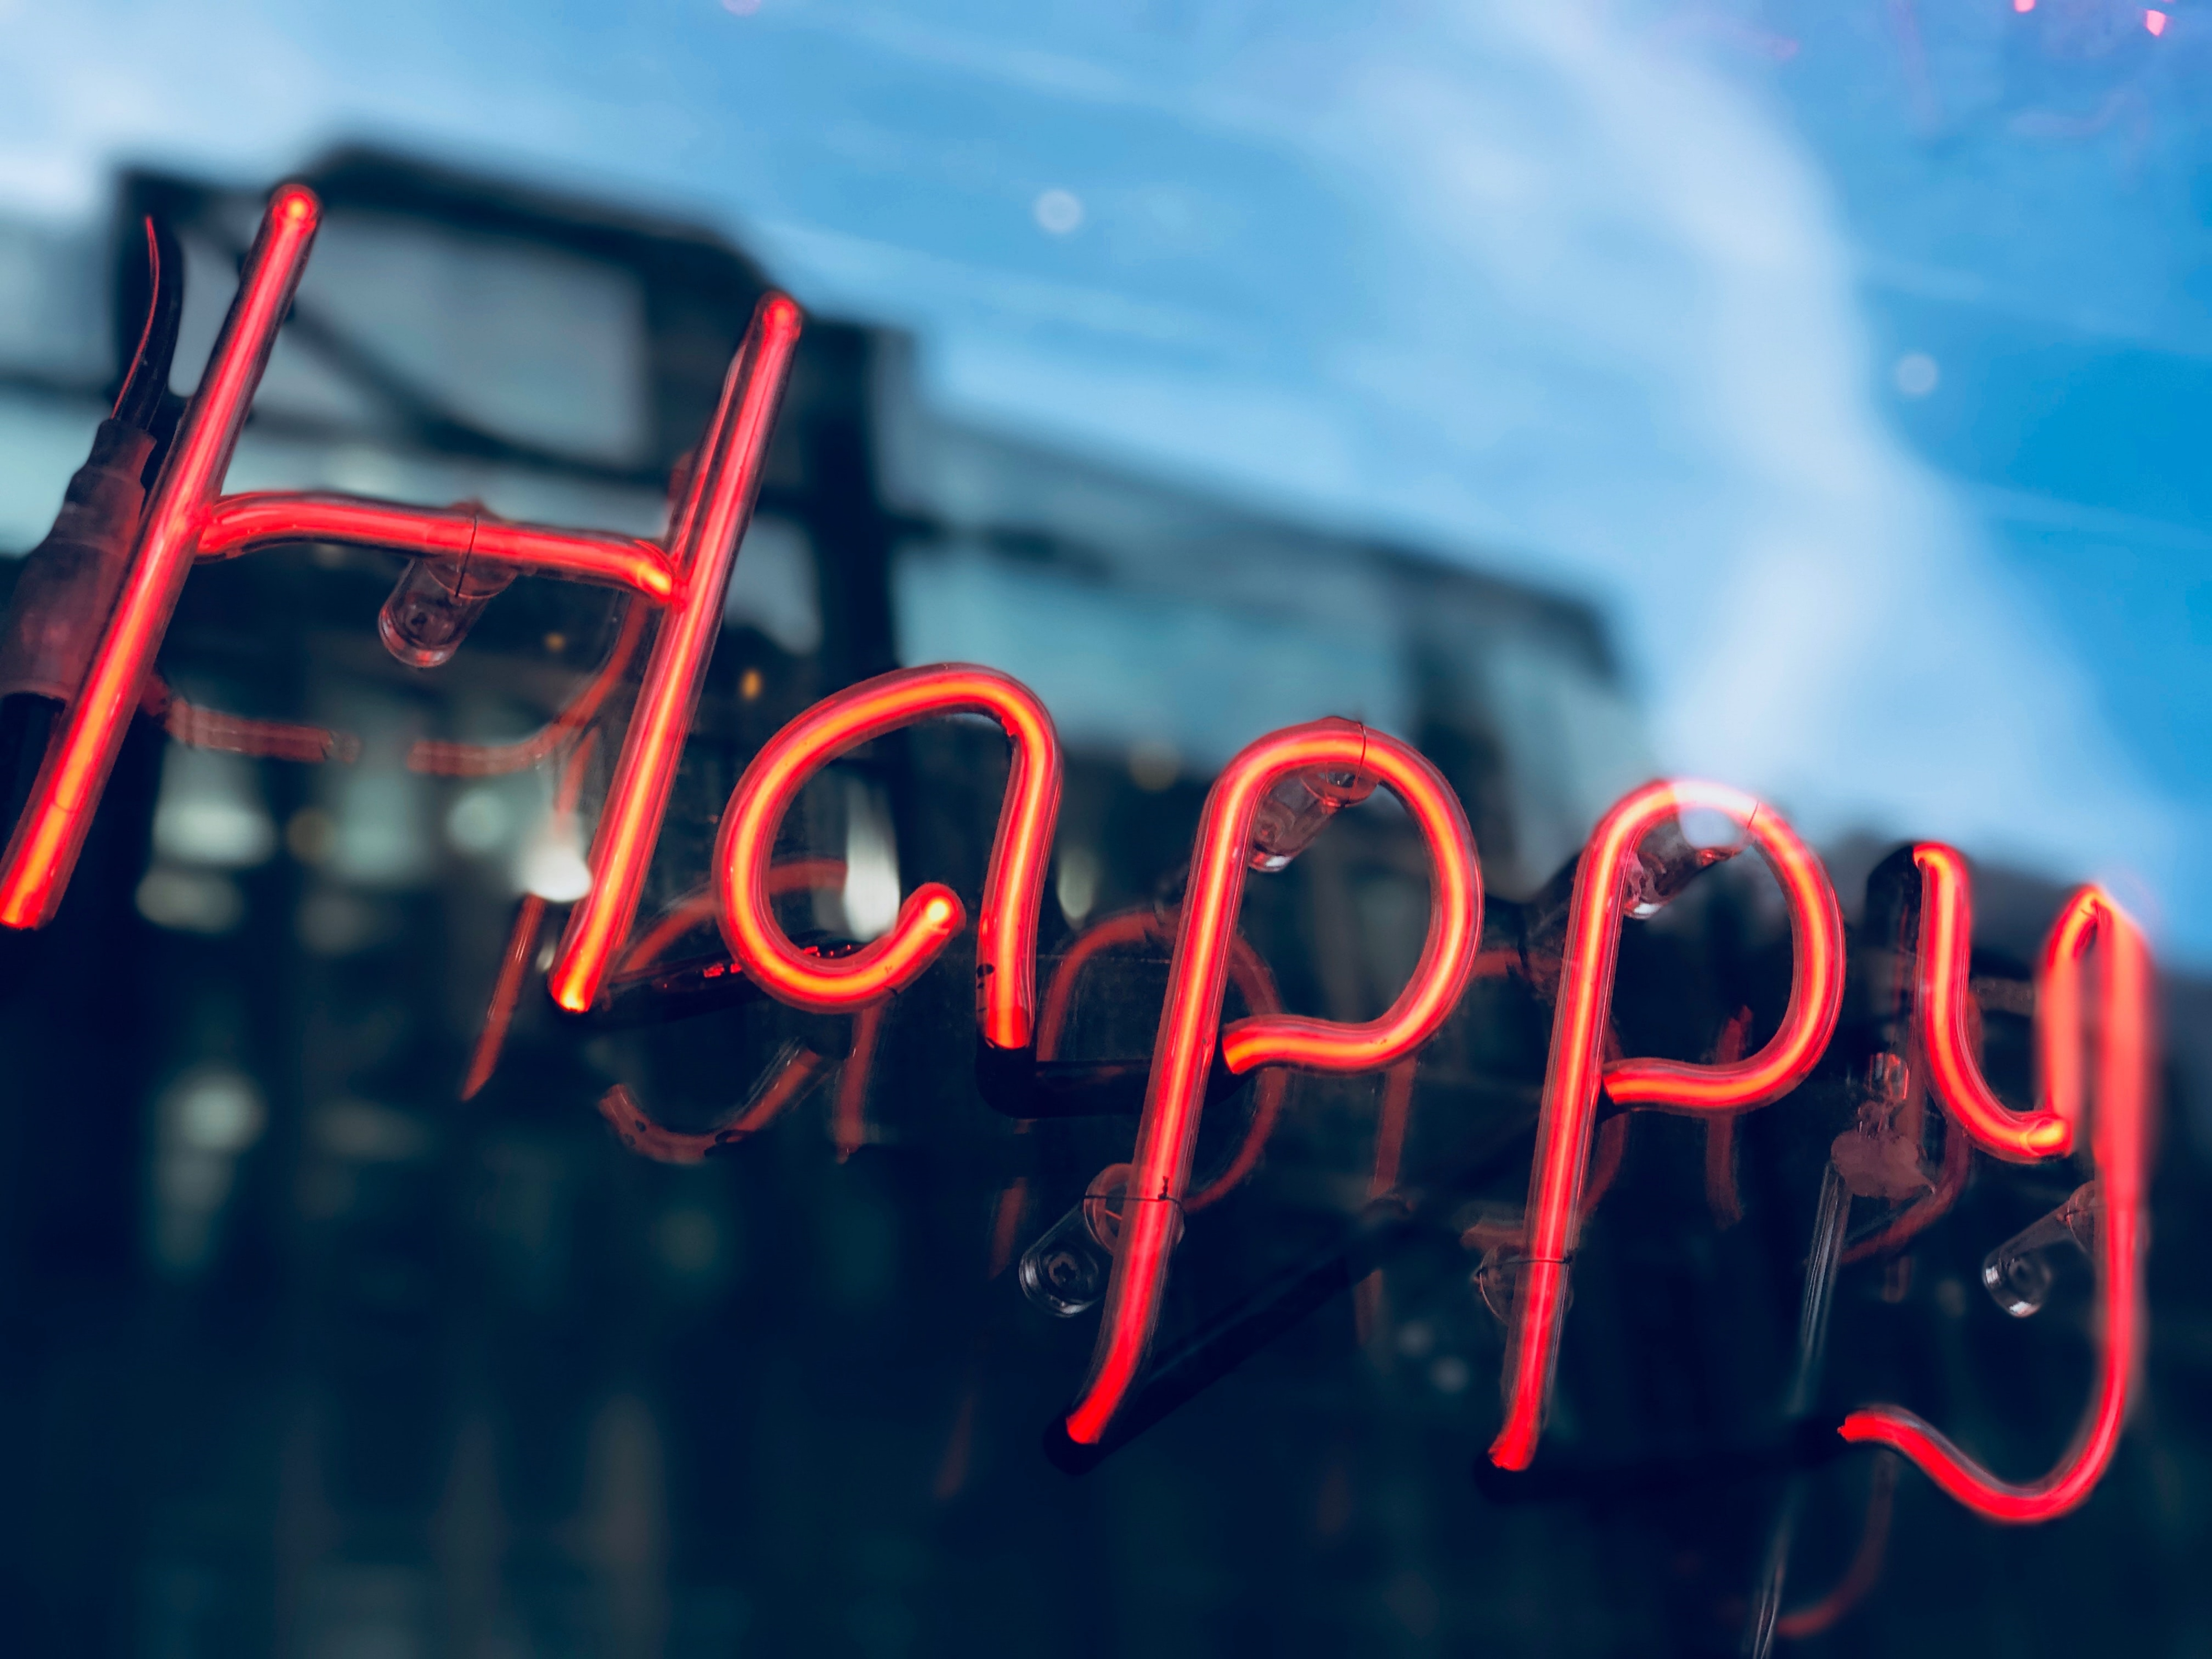

### **Introduction**

Happiness is an emotional state characterized by feelings of joy, satisfaction, contentment and fulfillment. Over the past few years, Kaggle has provided data which has various happiness indicators for different countries spread across the world. I explore the 2015 World Happiness Indicators Report data to find out which regions are more happy. I also try to establish corellation between happiness and some macro economic indicators.

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('2015.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [3]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


**Key Points**

1. Switzerland is the happiest country in the world with a happiness score of 7.587.
2. Togo is the least happiest of all the countries represented with a happiness score of 2.839.

Something important to note is that the top 5 happiest countries have a very high GDP per capita as compared to the bottom 5 countries. I will visualize the data to get a better understanding of the data.


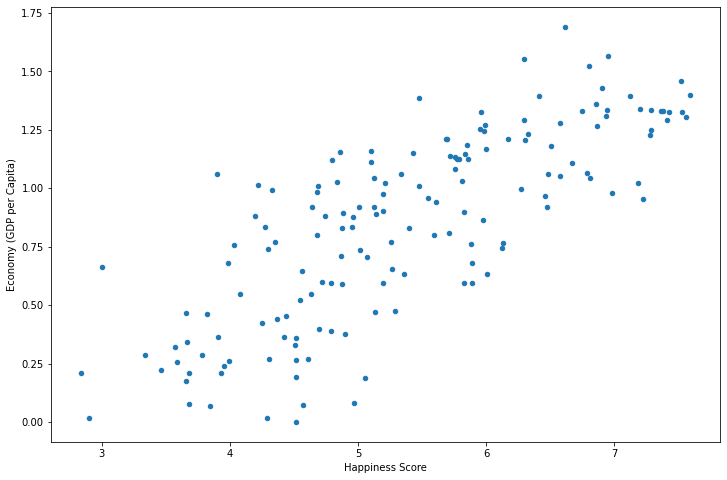

In [13]:
data.plot(kind = 'scatter', x= 'Happiness Score', y = 'Economy (GDP per Capita)', figsize = (12,8))

**Getting the coefficient of correlation**

In [18]:
from scipy import stats
stats.pearsonr(data['Happiness Score'], data['Economy (GDP per Capita)'])

(0.7809655268660216, 1.0505384131958297e-33)

Based on the Pearson's correlation coefficient, we conclude that there is a strong positive linear relationship between happiness score and the GDP per capita. 

In [4]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [5]:
data[data['Country']== 'Kenya']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
124,Kenya,Sub-Saharan Africa,125,4.419,0.04734,0.36471,0.99876,0.41435,0.42215,0.05839,0.37542,1.78555


**Correlation** **Matrix**

In [23]:
cordata = data.drop(['Standard Error','Happiness Rank','Dystopia Residual'], axis = 1) # dropping columns I don't need

In [24]:
cormat = cordata.corr()
round(cormat,2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Score,1.00,0.78,0.74,0.72,0.57,0.40,0.18
Economy (GDP per Capita),0.78,1.00,0.65,0.82,0.37,0.31,-0.01
Family,0.74,0.65,1.00,0.53,0.44,0.21,0.09
Health (Life Expectancy),0.72,0.82,0.53,1.00,0.36,0.25,0.11
Freedom,0.57,0.37,0.44,0.36,1.00,0.49,0.37
Trust (Government Corruption),0.40,0.31,0.21,0.25,0.49,1.00,0.28
Generosity,0.18,-0.01,0.09,0.11,0.37,0.28,1.00


**Heat Map for the correlation matrix**

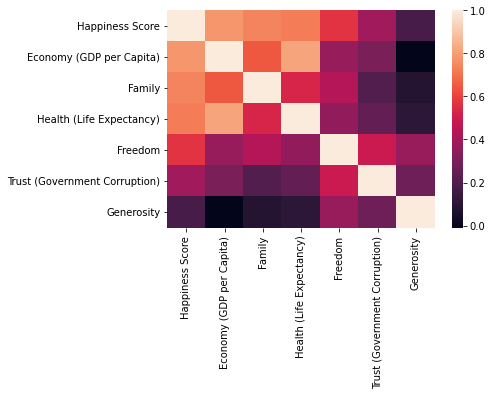

In [25]:
sns.heatmap(cormat)

**Few things to note from the heat map**

There is a strong positive linearity between:
1. Happiness score and life expectancy. Meaning countries where people live longer are happier than those where people don't live for long.
2. Happiness score and GDP per capita. 
3. Happiness score and family.

There is a weak linearity between:
1. Happiness score and generosity
2. Happiness score and Trust(Government and Corruption)

In [6]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [7]:
for region in data['Region'].unique():
  print(len(data[data['Region']== region]), region)

21 Western Europe
2 North America
2 Australia and New Zealand
20 Middle East and Northern Africa
22 Latin America and Caribbean
9 Southeastern Asia
29 Central and Eastern Europe
6 Eastern Asia
40 Sub-Saharan Africa
7 Southern Asia


In [8]:
rows_list=[]
for region in data['Region'].unique():
    happinessRankSum = data.loc[data['Region'] == region]['Happiness Rank'].sum()
    numCountriesInRegion = len(data.loc[data['Region'] == region])
    avgHappinessScorePerRegion = happinessRankSum/numCountriesInRegion;
    dict1 = {'Region': region, 'Happiness Rank Per Region': avgHappinessScorePerRegion, 'numCountriesInRegion': numCountriesInRegion};
    rows_list.append(dict1)

In [9]:
df = pd.DataFrame(rows_list)
df.sort_values(['Happiness Rank Per Region'], ascending=True, inplace=True)
df

,Region,Happiness Rank Per Region,numCountriesInRegion
2,Australia and New Zealand,9.500000,2
1,North America,10.000000,2
0,Western Europe,29.523810,21
4,Latin America and Caribbean,46.909091,22
7,Eastern Asia,64.500000,6
3,Middle East and Northern Africa,77.600000,20
6,Central and Eastern Europe,79.000000,29
5,Southeastern Asia,81.222222,9
9,Southern Asia,113.142857,7
8,Sub-Saharan Africa,127.900000,40


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Australia and New Zealand'),
 Text(0, 0, 'North America'),
 Text(0, 0, 'Western Europe'),
 Text(0, 0, 'Latin America and Caribbean'),
 Text(0, 0, 'Eastern Asia'),
 Text(0, 0, 'Middle East and Northern Africa'),
 Text(0, 0, 'Central and Eastern Europe'),
 Text(0, 0, 'Southeastern Asia'),
 Text(0, 0, 'Southern Asia'),
 Text(0, 0, 'Sub-Saharan Africa')]

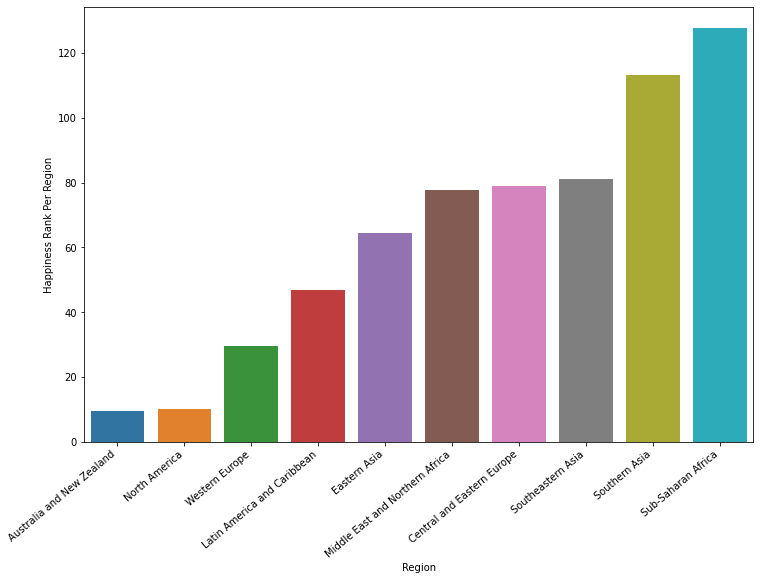

In [14]:
plt.figure(figsize=(12,8))
ax = sns.barplot(df['Region'], df['Happiness Rank Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

**Closing Remarks**

   
Australia and New Zealand is the happiest region in the world, followed closely 
by North America.

Sub-Saharan Africa and Southern Asia are the least happy regions in the world.


